In [77]:
# Load the drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical 

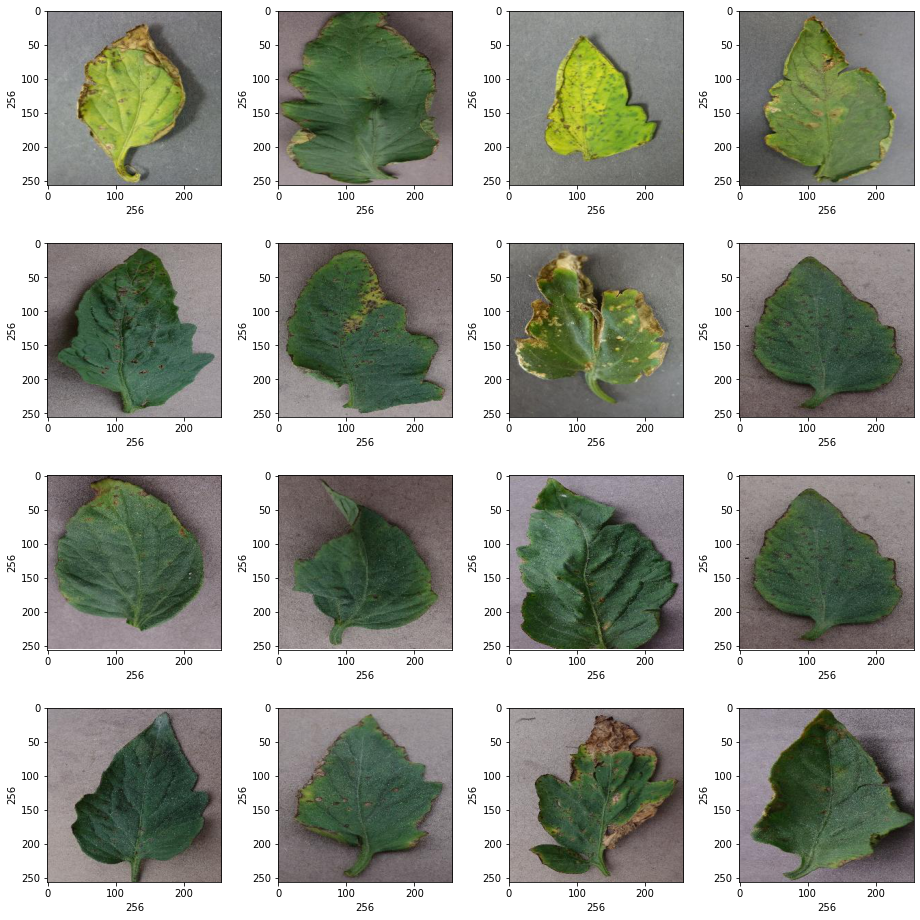

In [64]:
# Plotting 12 images to check dataset
plt.figure(figsize=(13,13))
path = "/content/drive/MyDrive/Colab Notebooks/Plant_images_prediction/Tomato___Bacterial_spot"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [65]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [66]:
dir = '/content/drive/MyDrive/Colab Notebooks/Plant_images_prediction/'
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [67]:
# Visualize the number of classes count 
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [68]:
image_list[0].shape

(256, 256, 3)

In [69]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 10)

In [71]:
x_train = np.array(x_train, dtype = np.float16) / 225.0
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [72]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [79]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 28224)             0         
                                                                 
 dense_6 (Dense)             (None, 8)                

In [80]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [81]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [82]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 30s 6s/step - loss: 1.0524 - accuracy: 0.3717 - val_loss: 0.9220 - val_accuracy: 0.4828
Epoch 2/50
4/4 [==============================] - 21s 5s/step - loss: 0.8866 - accuracy: 0.7065 - val_loss: 0.8157 - val_accuracy: 0.9310
Epoch 3/50
4/4 [==============================] - 21s 5s/step - loss: 0.7320 - accuracy: 0.8370 - val_loss: 0.6843 - val_accuracy: 0.7241
Epoch 4/50
4/4 [==============================] - 21s 5s/step - loss: 0.6043 - accuracy: 0.8935 - val_loss: 0.5831 - val_accuracy: 0.9483
Epoch 5/50
4/4 [==============================] - 21s 5s/step - loss: 0.4941 - accuracy: 0.9413 - val_loss: 0.4815 - val_accuracy: 0.8793
Epoch 6/50
4/4 [==============================] - 21s 5s/step - loss: 0.4067 - accuracy: 0.9326 - val_loss: 0.4131 - val_accuracy: 0.9828
Epoch 7/50
4/4 [==============================] - 21s 5s/step - loss: 0.3317 - accuracy: 0.9630 - val_loss: 0.3401 - val_accuracy: 0.9483
Epoch 8/50
4/4 [==================

In [83]:
model.save('/content/drive/MyDrive/Colab Notebooks/Plant_images_prediction.h5')
# Serialize model to json 
json_model = model.to_json()
with open('/content/drive/MyDrive/Colab Notebooks/Plant_images_prediction.json', 'w') as json_file:
    json_file.write(json_model)
# Saving the weights of the model 
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Plant_images_prediction.h5')

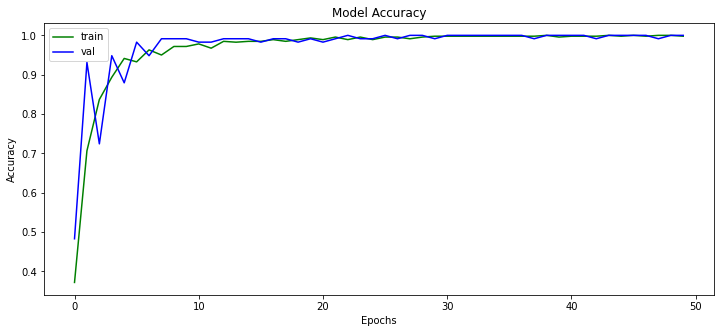

In [84]:
# Ploting the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='g') 
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [86]:
print('[INFO] Calculating model accuracy')
scores = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {scores[1]*100}')

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 504ms/step - loss: 0.0530 - accuracy: 0.9889
Test Accuracy : 98.88888597488403


In [87]:
y_pred = model.predict(x_test)

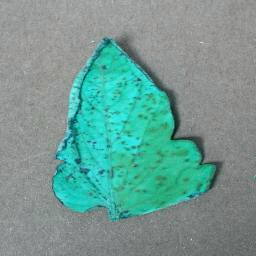

In [96]:
# Ploting image to compare 
img = array_to_img(x_test[34])
img

In [97]:
# Finding max value from predition list and comaparing original value vs predicted 
print('Originally : ', all_labels[np.argmax(y_test[34])])
print('Predicted : ', all_labels[np.argmax(y_pred[34])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust


Garut, 17 Juli 2022
Shopi Nurhidayanti
---
Cr : Pianalytix
